# External
How could we express a matrix? <br />
Idea: Use a list of lists

In [1]:
M = [[1,2,3], [4,5,6], [7,8,9]]

How would we extract one row?

In [2]:
M[1]

[4, 5, 6]

How would we extract one column?

In [3]:
[M[0][1], M[1][1], M[2][1]]

[2, 5, 8]

Problems:
* Not all axes can be accessed easily
* Lists can contain different object, matrices should have a homogeneous structure
* List elements can be scattered in memory -> not good for performance

## Numpy

* Fundamental package for scientific computing
* Probably already installed - sadly not here...
* $N$-dimensional arrays `a = array([[1, 2, 3], [4, 5, 6]])`
* Linear algebra (dot product, cross product, svd)
* Random numbers...

In [4]:
import numpy as np
vect = np.arange(12)

In [5]:
print(vect)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [6]:
#slicing for 1d arrays works just like with lists
vect[3:11:2]

array([3, 5, 7, 9])

In [7]:
matrix = vect.reshape(4, 3)
print(matrix)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [8]:
#slicing for nd-arrays, [startX:stopX:stepX,startY:stopY:stepY,...]
matrix[1:3]

array([[3, 4, 5],
       [6, 7, 8]])

In [9]:
matrix[1:3,1:3]

array([[4, 5],
       [7, 8]])

In [10]:
matrix.shape

(4, 3)

In [11]:
matrix.transpose()

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [12]:
A = matrix
B = matrix.transpose()
np.dot(A,B)      #matrix product

array([[  5,  14,  23,  32],
       [ 14,  50,  86, 122],
       [ 23,  86, 149, 212],
       [ 32, 122, 212, 302]])

In [13]:
A.dot(B)

array([[  5,  14,  23,  32],
       [ 14,  50,  86, 122],
       [ 23,  86, 149, 212],
       [ 32, 122, 212, 302]])

In [14]:
A@B #only in the newer versions of python and numpy

array([[  5,  14,  23,  32],
       [ 14,  50,  86, 122],
       [ 23,  86, 149, 212],
       [ 32, 122, 212, 302]])

In [16]:
for row in matrix:
    print(row)
    print("****")

[0 1 2]
****
[3 4 5]
****
[6 7 8]
****
[ 9 10 11]
****


### Example: SVD

In [19]:
import numpy as np
from numpy.linalg import svd, pinv

A = np.array([[1., 3., 5.],[2., 4., 6.]])
U,S,V = svd(A)
S2 = np.zeros_like(A.transpose())
for n in range(len(S)): S2[n,n] = 1. / S[n]

print("SVD-Pseudo-Inverse: \n", np.dot(V.transpose(), np.dot(S2, U.transpose())))
print()
print("Numpy-Pseudo-Inverse: \n",pinv(A))


SVD-Pseudo-Inverse: 
 [[-1.33333333  1.08333333]
 [-0.33333333  0.33333333]
 [ 0.66666667 -0.41666667]]

Numpy-Pseudo-Inverse: 
 [[-1.33333333  1.08333333]
 [-0.33333333  0.33333333]
 [ 0.66666667 -0.41666667]]


### Example: Polynomials

In [20]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([6, 11, 18, 27, 38])

p = np.polyfit(x,y,2)

print(p)

[ 1.  2.  3.]


$1 \cdot x^2 + 2 \cdot x + 3$

## matplotlib

* 2D/3D plotting library
* Probably already installed
* Histograms
* Function plots
* Bar charts
* Scatterplots
* http://matplotlib.org/gallery.html

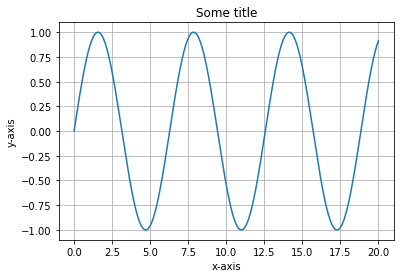

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 20, 1000)  # 1000 evenly-spaced values from 0 to 20
y = np.sin(x)
plt.plot(x, y)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Some title')
plt.grid(True)
plt.show()
#savefig("test.png")

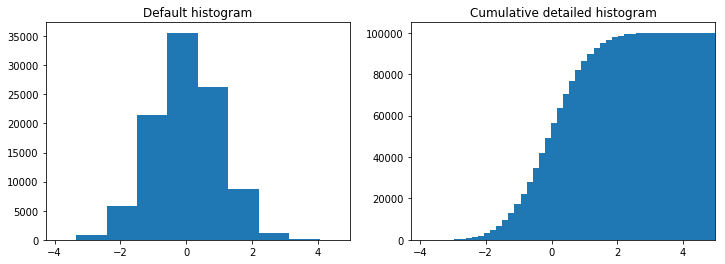

In [22]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

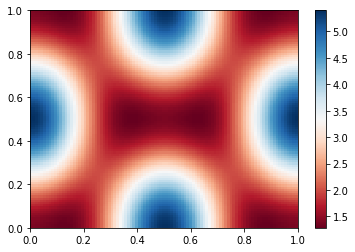

In [23]:
import matplotlib
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

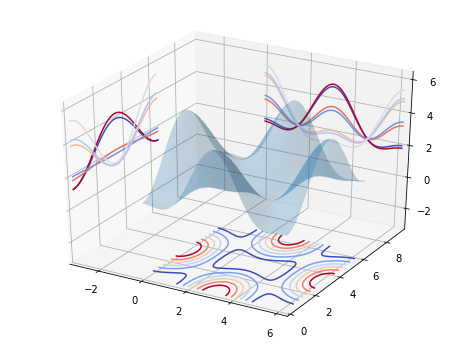

In [24]:
import matplotlib
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

Source: http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

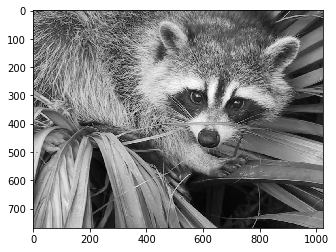

In [25]:
from scipy import misc
face = misc.face(gray = True)
plt.imshow(face, cmap=plt.cm.gray)

In [26]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ..., 
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)